# **Impact of Recession on Automobile Sales** 

# Objectives
- Create informative and visually appealing plots with Matplotlib and Seaborn.
- Apply visualization to communicate insights from the data.
- Analyze data through using visualizations.
- Customize visualizations

# Setup


*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.
*  [`Folium`](https://python-visualization.github.io/folium/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.


### Installing Required Libraries


In [7]:
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install folium

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Importing Required Libraries

In [9]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests

---


# Scenario

We will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, we aim to gain insights into how recessions impacted automobile sales for the company.


---


# Importing Data


In [14]:
#Download the CSV file from the URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
response = requests.get(url)

#Save the CSV to a local file
with open("historical_automobile_sales.csv", "wb") as file:
    file.write(response.content)

#Read the saved CSV file into a DataFrame
df = pd.read_csv("historical_automobile_sales.csv")

#Verify
print("Data downloaded and saved successfully!")
df.head()

Data downloaded and saved successfully!


,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [15]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [16]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

---


# Creating Visualizations for Data Analysis


### Fluctuation of Average Automobile Sales with Time


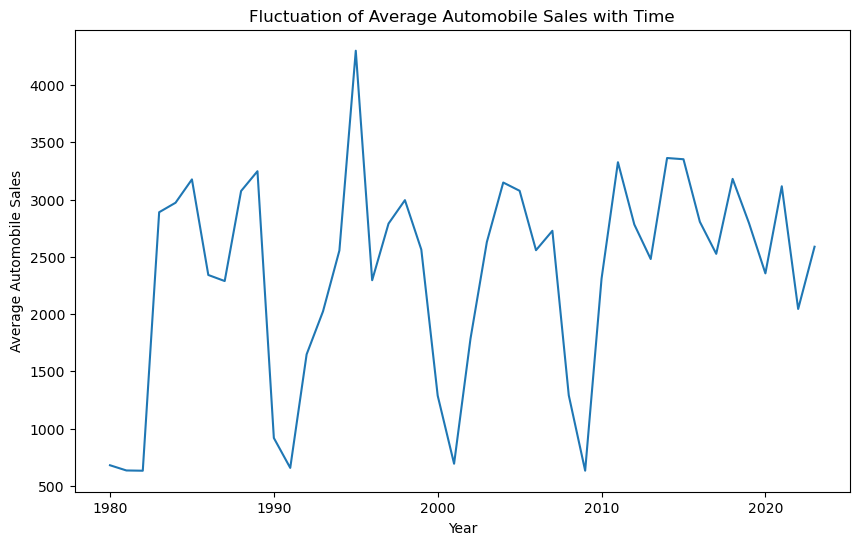

In [20]:
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Fluctuation of Average Automobile Sales with Time')
plt.show()

### Refining plot by adding
ticks on x- axis with all the years, to identify the years of recession 
<br>annotation for at least two years of recession
<br>Title as Automobile Sales during Recession
<br> 


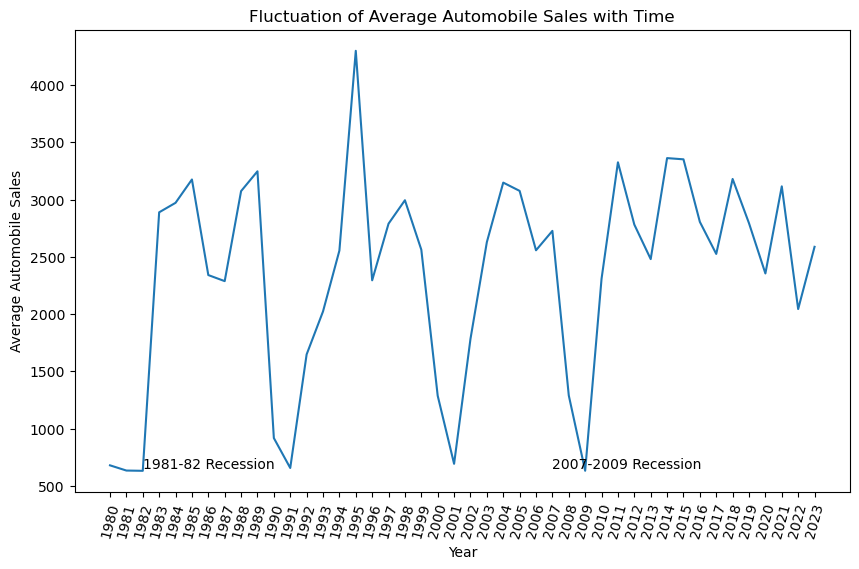

In [22]:
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
plt.figure(figsize=(10, 6))
df_line.plot(kind = 'line')
plt.xticks(list(range(1980,2024)), rotation = 75)
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Fluctuation of Average Automobile Sales with Time')
plt.text(1982, 650, '1981-82 Recession')
plt.text(2007,650, '2007-2009 Recession')
plt.show()

---



#### Normalized Automobile Sales by Vehicle Type During Recession


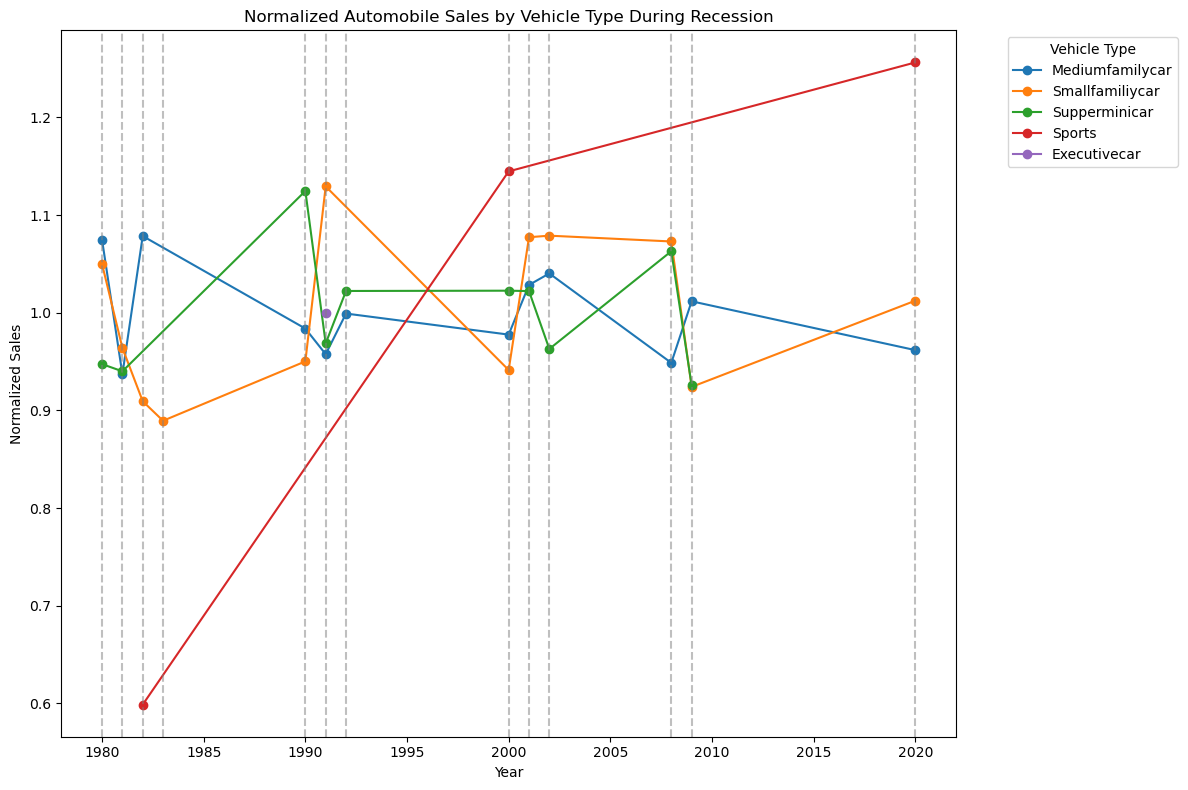

In [25]:
# Assuming 'df' is your dataset
df_rec = df[df['Recession'] == 1]

# Calculate the average automobile sales by year and vehicle type during the recession
df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Calculate the normalized sales by dividing by the average sales for each vehicle type
df_Mline['Normalized_Sales'] = df_Mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x: x / x.mean())

# Set the 'Year' as the index
df_Mline.set_index('Year', inplace=True)

# Create the plot for each vehicle type
plt.figure(figsize=(12, 8))
for vehicle_type in df_Mline['Vehicle_Type'].unique():
    data = df_Mline[df_Mline['Vehicle_Type'] == vehicle_type]
    plt.plot(data.index, data['Normalized_Sales'], label=vehicle_type, marker='o')

# Highlight recession years
recession_years = df_rec['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)

# Add labels, legend, and title
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Normalized Sales")
plt.xlabel("Year")
plt.title("Normalized Automobile Sales by Vehicle Type During Recession")

# Show the plot
plt.tight_layout()
plt.show()

#### Insights


During recessions, medium family, small family, and supermini cars maintain fairly stable sales near the average (normalized~1). Sports cars show a clear upward trend, with sales rising above their long-term average, indicating resilience. There’s little or no visible data for executive cars, suggesting low or absent sales during recession periods.

----


### Average Automobile Sales during Recession and Non-Recession

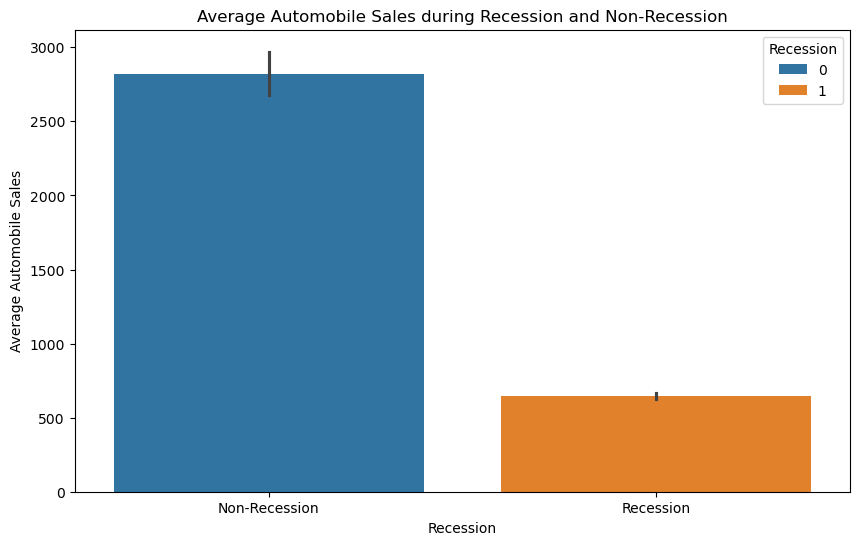

In [30]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Create the bar chart using seaborn
plt.figure(figsize=(10,6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=df)
plt.xlabel('Recession')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

### Now we want to compare the sales of different vehicle types during a recession and a non-recession period
<br>For that we use the functionality of **Seaborn Library** to create this visualization

In [32]:
grouped_df = df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
grouped_df

,Recession,Vehicle_Type,Automobile_Sales
0,0,Executivecar,2686.436232
1,0,Mediumfamilycar,2981.501935
2,0,Smallfamiliycar,2752.658140
3,0,Sports,2910.636264
4,0,Supperminicar,2495.242222
5,1,Executivecar,564.000000
6,1,Mediumfamilycar,674.847619
7,1,Smallfamiliycar,650.733333
8,1,Sports,170.333333
9,1,Supperminicar,659.270968


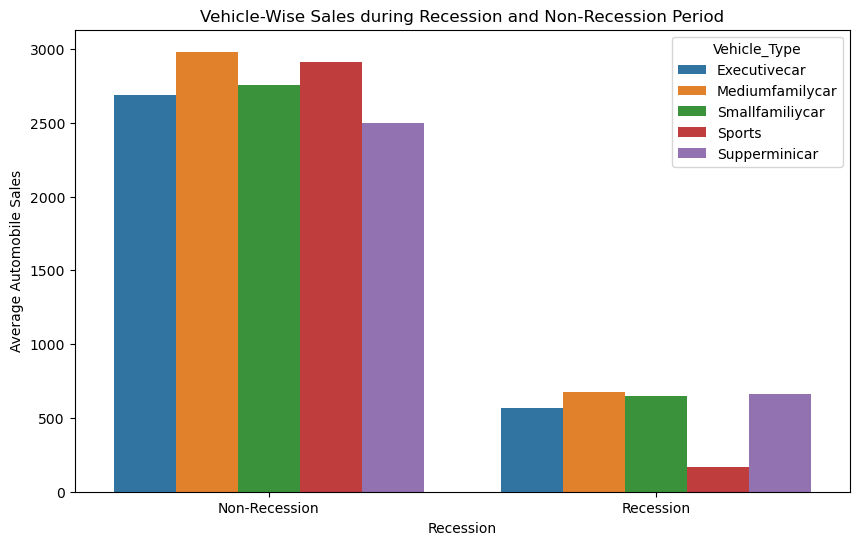

In [33]:
#Grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=grouped_df)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Recession')
plt.ylabel('Average Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()

### Insights


There is a drastic decline in the overall sales trend of the automobile during the recession as compared to during non-recession period. Specifically, the sales of sports-type vehicles dropped the most.

---


### Let us compare the variations in GDP during recession and non-recession period by developing line plots for each period.
<br>Now, we want to find more insights from the data to understand the reason.
#### How did the GDP vary over time during recession and non-recession periods? 
<br>Make use of <u>add_subplot()</u> from Matplotlib for this comparision.


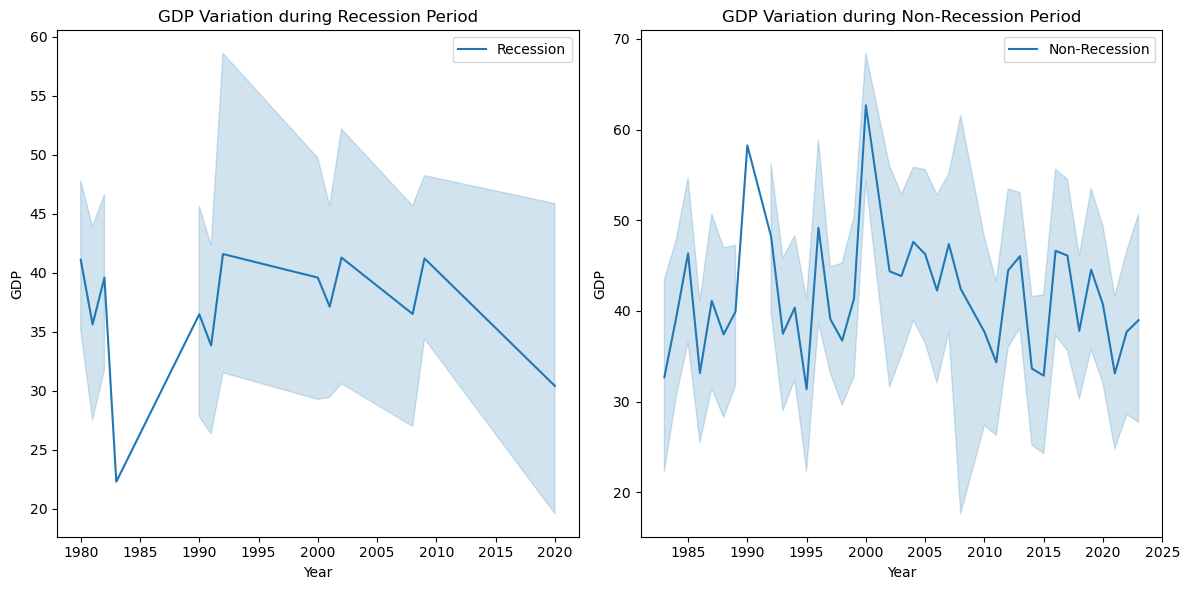

In [38]:
#Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]
 
#Figure
fig=plt.figure(figsize=(12, 6))
  
#Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). 
 
#plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')
   
#plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession',ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')
   
plt.tight_layout()
plt.show()

### Inference
From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company

---


### Let us now see how has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

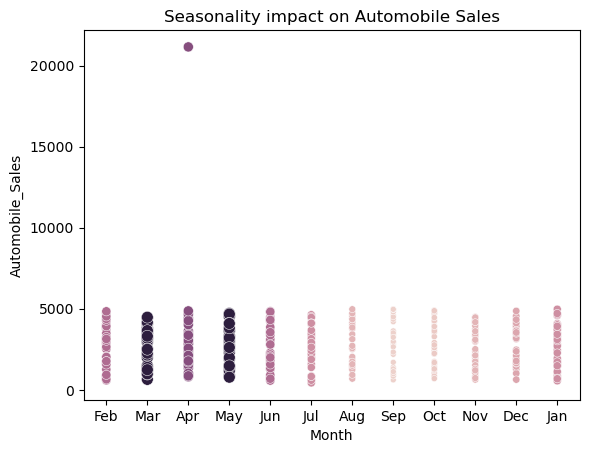

In [42]:
non_rec_data = df[df['Recession'] == 0]

size=non_rec_data['Seasonality_Weight'] #for bubble effect

sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight', legend=False)

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

### Inference
From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April.


---


 ### Identify the correlation between average vehicle price relate to the sales volume during recessions.

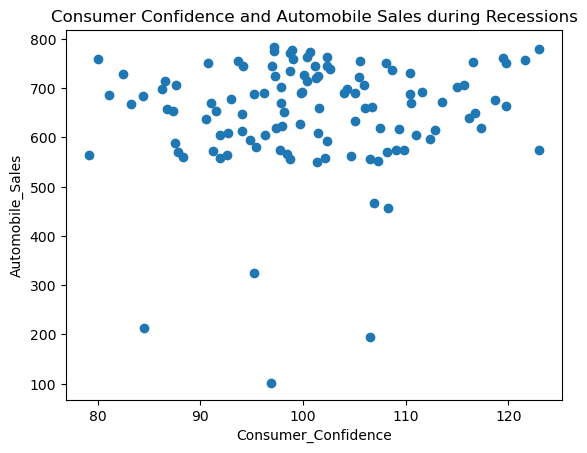

In [46]:
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
plt.xlabel('Consumer_Confidence')
plt.ylabel('Automobile_Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.show()


 ### How does the average vehicle price relate to the sales volume during recessions?

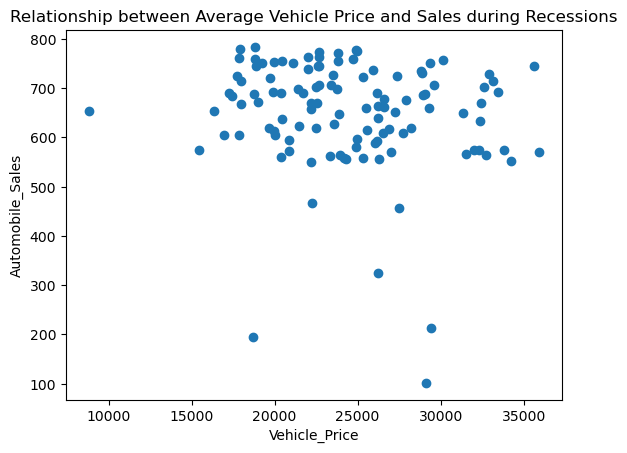

In [48]:
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])

plt.xlabel('Vehicle_Price')
plt.ylabel('Automobile_Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.show()

### Inference
There is not much relation!

----


 ### How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods? 


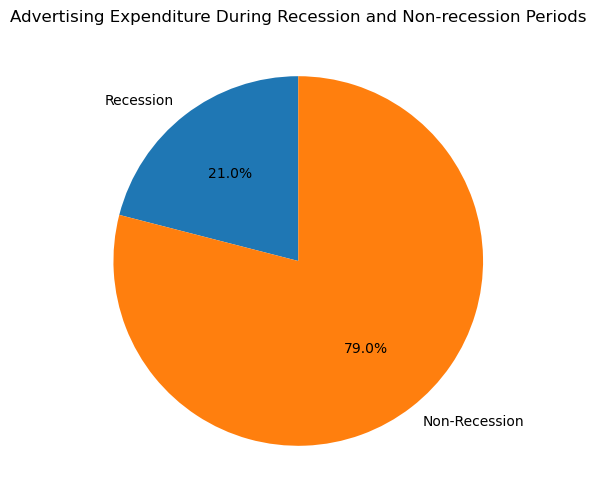

In [52]:
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure During Recession and Non-recession Periods')

plt.show()

#### Insights


The advertisement expenditure during the non-recession period is almost 4 times that of during the recession period. Which is a good idea!

---


### Let us observe the share of each vehicle type in total expenditure during recessions.

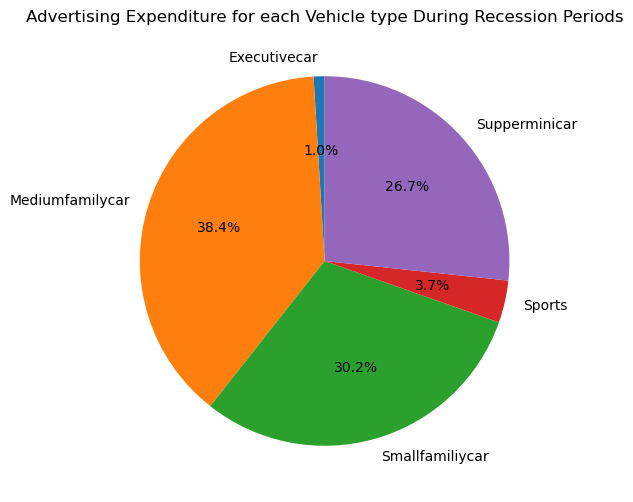

In [57]:
Rdata = df[df['Recession'] == 1]

# Calculate the sales volume by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(10, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure for each Vehicle type During Recession Periods')

plt.show()

### Inference
During recession the advertisements were mostly focued on low price range vehicle. A wise decision!

----


 ### Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period

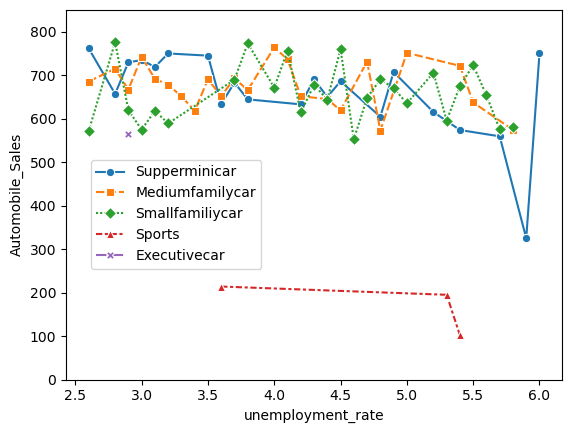

In [61]:
df_rec = df[df['Recession']==1]
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers=['o', 's', 'D', '^', 'X'], err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))
plt.show()

#### Insights

It doesn't seem like unemployment_rate has a clear relationship with automobile sales. We can see a big dip right before 6.0 for super mini car and then it shoot back up at 6.0.

---


### Creating a map on the hightest sales region/offices of the company during recession period


In [66]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json"
response = requests.get(url)

# Open a file in write-binary mode ('wb') and save the contents of the response
# This will create a local file named 'us-states.json' and write the downloaded data into it
with open("us-states.json", "wb") as f:
    f.write(response.content)

print("File downloaded and saved as 'us-states.json'")

File downloaded and saved as 'us-states.json'


#### We found that the datset also contains the location/city for company offices. Now we want to show the recession impact on various offices/city sales by developing a choropleth


In [68]:
# Filter the data for the recession period and specific cities
recession_data = df[df['Recession'] == 1]

# Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data= 'us-states.json',  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)


# Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Display the map
map1